In [ ]:
import sys
import numpy as np
import cv2
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'cv2'

In [5]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     |████████████████████████████████| 91.1MB 27.1MB/s eta 0:00:01     |█████████▋                      | 27.4MB 10.1MB/s eta 0:00:07
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done

In [ ]:
# https://deep-learning-study.tistory.com/110
oldx = oldy = -1 # 좌표 기본값 설정

def on_mouse(event, x, y, flags, param):
    # event는 마우스 동작 상수값, 클릭, 이동 등등
    # x, y는 내가 띄운 창을 기준으로 좌측 상단점이 0,0이 됌
    # flags는 마우스 이벤트가 발생할 때 키보드 또는 마우스 상태를 의미, Shif+마우스 등 설정가능
    # param은 영상이룻도 있도 전달하고 싶은 데이타, 안쓰더라도 넣어줘야함
    

    global oldx, oldy # 밖에 있는 oldx, oldy 불러옴

    if event == cv2.EVENT_LBUTTONDOWN: # 왼쪽이 눌러지면 실행
        oldx, oldy = x, y # 마우스가 눌렀을 때 좌표 저장, 띄워진 영상에서의 좌측 상단 기준
        print('EVENT_LBUTTONDOWN: %d, %d' % (x, y)) # 좌표 출력

    elif event == cv2.EVENT_LBUTTONUP: # 마우스 뗏을때 발생
        print('EVENT_LBUTTONUP: %d, %d' % (x, y)) # 좌표 출력

    elif event == cv2.EVENT_MOUSEMOVE: # 마우스가 움직일 때 발생
        if flags & cv2.EVENT_FLAG_LBUTTON: # ==를 쓰면 다른 키도 입력되었을 때 작동안하므로 &(and) 사용
            # cv2.circle(img, (x, y), 5, (0, 255, 0), -1) # 단점이 빠르게 움직이면 끊김
            # circle은 끊기므로 line 이용
            # 마우스 클릭한 좌표에서 시작해서 마우스 좌표까지 그림
            cv2.line(img, (oldx, oldy), (x, y), (0, 0, 255), 40, cv2.LINE_AA)
            cv2.imshow('image', img)
            oldx, oldy = x, y # 그림을 그리고 또 좌표 저장

# 흰색 컬러 영상 생성
# img = np.ones((480, 640, 3), dtype=np.uint8) * 255
img = cv2.imread('./img.jpg')


# 윈도우 창
cv2.namedWindow('image')

# 마우스 입력, namedWIndow or imshow가 실행되어 창이 떠있는 상태에서만 사용가능
# 마우스 이벤트가 발생하면 on_mouse 함수 실행
cv2.setMouseCallback('image', on_mouse, img)


# 영상 출력
cv2.imshow('image', img)
cv2.waitKey()

cv2.destroyAllWindows()

EVENT_LBUTTONDOWN: 673, 316
EVENT_LBUTTONUP: 657, 384


In [3]:
def make_mask(img):
    img = np.array(img)
    mask = np.zeros((img.shape))
    if np.where(img == [0,0,255]): #BGR
        mask[np.where((img == [0,0,255]).all(axis=2))] = [1,1,1]
    return mask

True

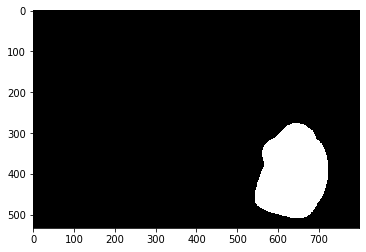

In [5]:
mask = make_mask(img)
plt.imshow(mask)


cv2.imwrite('./lama/data_for_prediction/img.png', img)
cv2.imwrite('./lama/data_for_prediction/img_mask.png', mask*255)

mask에서 구멍이 생기는 부분 hole filling (또는 노이즈 제거) 필요